In [1]:
!pip install cvxpy

You should consider upgrading via the '/Users/Anna.Rudenko/opt/anaconda3/envs/myenv/bin/python3.8 -m pip install --upgrade pip' command.


In [3]:
import cvxpy as cp
import numpy as np

In [34]:
np.random.seed(15)

In [35]:
import matplotlib.pyplot as plt

In [122]:
def CAMNS_LP(X, N):
    TOL_LP = 1e-3
    TOL_EXT = 1e-6
    TOL_ZEROS = 1e-6
    M, L= X.shape
    ind = np.sum(abs(X), axis=0) >= TOL_ZEROS

    Xn = X.T[ind, :]
   
    LL = len(ind)

    eye = np.ones((M,1))
   
#     d = (Xn @ eye) /M
    d = Xn[:,1]/Xn.sum()
#     print(d.shape)
    matrix = Xn #- d @ eye.T
    C, Sigma, V= np.linalg.svd(matrix)
#     d = C[N, :]
    C, Sigma, V = C[:N], Sigma[:N], V[:N]
    
#     print(d.shape)
    el = 0
    Q1 = np.zeros((LL,1))
    hS = []
    lp_cnt = 0
#     d = d[:3]
    
    B = np.eye(L)
    

    
    while el<N:

        w = np.random.uniform(size=(LL,1))
#         w2 = Q1.T @ w
        r = B@w 
#         b = - C.T @ r
#         A = -C.T
        c= d
        
        
        x = cp.Variable(M)
        objective = cp.Minimize(r.T @ (C.T @ x + d.squeeze()))
        constraints = [C.T @ x + d.squeeze() >= 0]
        prob = cp.Problem(objective, constraints)
        prob.solve()
        alpha1 = x.value

        x2 = cp.Variable(M)
        objective2 = cp.Maximize(r.T @ (C.T @ x2 + d.squeeze()))
        constraints2 = [C.T @ x2 + d.squeeze() >= 0]
        prob2 = cp.Problem(objective2, constraints2)
        prob2.solve()
        alpha2 = x2.value


        
        
        if el == 0:
            if is_ext_pt(C.T, d, alpha1 ,TOL_EXT):

                a = C.T @ alpha1 + d.squeeze()
                a= np.expand_dims(a, axis=0)
                hS = a
                
        
                print('find extreme point minimizimg LP')
            if is_ext_pt(C.T , d, alpha2 ,TOL_EXT):
#              
                    if hS == []:
                        a = C.T @ alpha2 + d.squeeze()
                        a= np.expand_dims(a, axis=0)
                        hS = a
                    else:
                        a = C.T @ alpha2 + d.squeeze()
                        a= np.expand_dims(a, axis=0)
                        
                        hS = np.concatenate((hS, a), axis = 0)
                    print('find extreme point miaximizimg LP')
        else:
            p_star = r.T @ (C.T @ alpha1 + d.squeeze())
            q_star = r.T @ (C.T @ alpha2 + d.squeeze())
            
            if np.allclose(abs(p_star),0,rtol= TOL_LP) == False:

                if is_ext_pt(C.T, d, alpha1 ,TOL_EXT):
                    a = C.T @ alpha1 + d.squeeze()
                    a = np.expand_dims(a, axis=0)
               
                    hS = np.concatenate((hS, a), axis = 0)
                    print('find extreme point minimizimg LP')
            
            if np.allclose(abs(q_star),0,rtol= TOL_LP) == False:

                if is_ext_pt(C.T , d, alpha2 ,TOL_EXT):
                    a = C.T @ alpha2 + d.squeeze()
                    a = np.expand_dims(a, axis=0)
                    hS = np.concatenate((hS, a), axis = 0)
                    print('find extreme point miaximizimg LP')
        
        hS = hS.T

        el = hS.shape[1]
        
        q,_ = np.linalg.qr(hS)

        B = np.eye(L) - q@q.T 
        hS = hS.T
        
    return hS

In [123]:
def is_ext_pt(C, d, x ,tol):
    L, D = C.shape
    
    ind = abs(C@x+d.squeeze())<tol
    T = C[ind, :]
    _, sin_value, _ = np.linalg.svd(T)
    temp = sin_value / np.sum(sin_value)
#     print('summa. ',sum(temp>tol))
    ran = sum(temp>tol)
    return ran == D
    

In [124]:
from skimage.io import imread

image1 = imread('zhang1.jpg')
image11 = image1/255
image2 = imread('cao1.jpg')
image22 = image2/255
image3 = imread('ksiwek1.jpg')
image33 = image3/255


In [125]:
m, n = image1.shape
L = m * n

s1 = image11.reshape((L, 1))
s2 = image22.reshape((L, 1))
s3 = image33.reshape((L, 1))

In [126]:


N, M = 3, 3

S = np.stack((s1,s2, s3), axis = 0)
SS = S.squeeze()

AA = np.random.random(size=(N, M))
A = AA/(np.ones((N,1))*np.sum(AA))

X = A @ SS

In [127]:
Y = CAMNS_LP(X, N)

/Users/Anna.Rudenko/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/cvxpy/problems/problem.py:1060: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


find extreme point minimizimg LP
find extreme point miaximizimg LP


<ipython-input-122-45641813fde6>:71: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if hS == []:


find extreme point minimizimg LP
find extreme point miaximizimg LP


In [128]:
X1 = X[0,:].reshape(m,n)
X2 = X[1,:].reshape(m,n)
X3 = X[2,:].reshape(m,n)

In [129]:
Y1 = Y[0,:].reshape(m,n)
Y2 = Y[1,:].reshape(m,n)
Y3 = Y[2,:].reshape(m,n)
Y4 = Y[3,:].reshape(m,n)

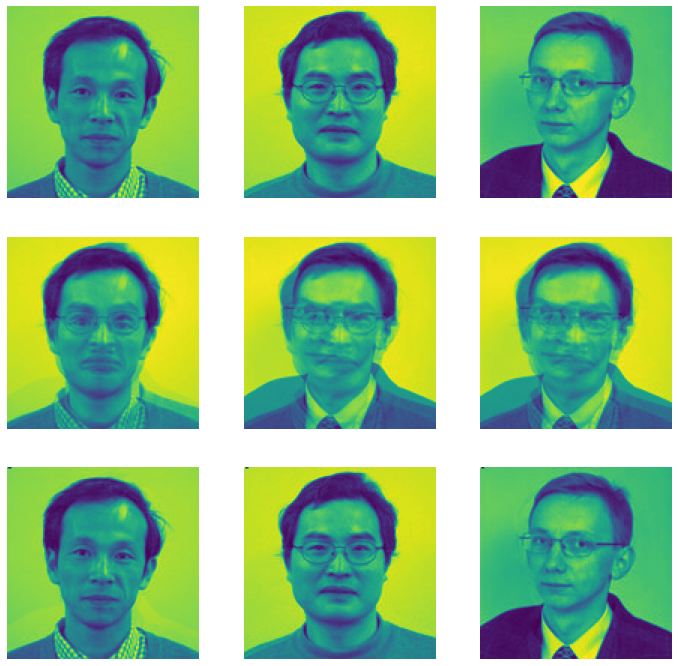

In [139]:
plt.figure(figsize=(12, 12))


plt.subplot(3, 3, 1)
plt.axis("off")
plt.imshow(image1)

plt.subplot(3, 3, 2)
plt.axis("off")
plt.imshow(image2)

plt.subplot(3, 3, 3)
plt.axis("off")
plt.imshow(image3)

plt.subplot(3, 3, 4)
plt.axis("off")
plt.imshow(X1)

plt.subplot(3, 3, 5)
plt.axis("off")
plt.imshow(X2)

plt.subplot(3, 3, 6)
plt.axis("off")
plt.imshow(X3)

plt.subplot(3, 3, 7)
plt.axis("off")
plt.imshow(Y2)



plt.subplot(3, 3, 8)
plt.axis("off")
plt.imshow(Y3)



plt.subplot(3, 3, 9)
plt.axis("off")
plt.imshow(Y4)
plt.show();

The result is not completely reproducable. Often only image zhang1.jpg and 'ksiwek1.jpg' are distuingishable, but cao1.jpg is not. Moreover sometimes the resulting tensor of CAMNS_LP may have 3 columns and sometimes 4. Choice of d and C impacts a lot.